In [13]:
# 1. 加载插件
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [14]:
# 2. 建立连接（注意相对路径）
# sqlite:/// 后面跟着的是你硬盘上的文件路径
%sql sqlite:///../data/olist.db

In [19]:
# 3. 提取数据并转为 Pandas Dataframe
import sqlite3
import pandas as pd

# 建立数据库连接（使用你已经验证过的相对路径）
conn = sqlite3.connect('../data/olist.db')

# 编写 SQL（注意：别名 order_count 加了下划线，避免空格报错）
sql_query = """
SELECT payment_type, COUNT(*) as order_count 
FROM olist_order_payments_dataset 
GROUP BY 1 
ORDER BY order_count DESC
"""

# 直接用 pandas 读取 SQL 结果，一步到位
df = pd.read_sql(sql_query, conn)

print("✅ 数据提取成功！前5行如下：")
display(df.head())

✅ 数据提取成功！前5行如下：


,payment_type,order_count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


<Axes: title={'center': 'Olist Payment Methods Distribution'}, xlabel='payment_type'>

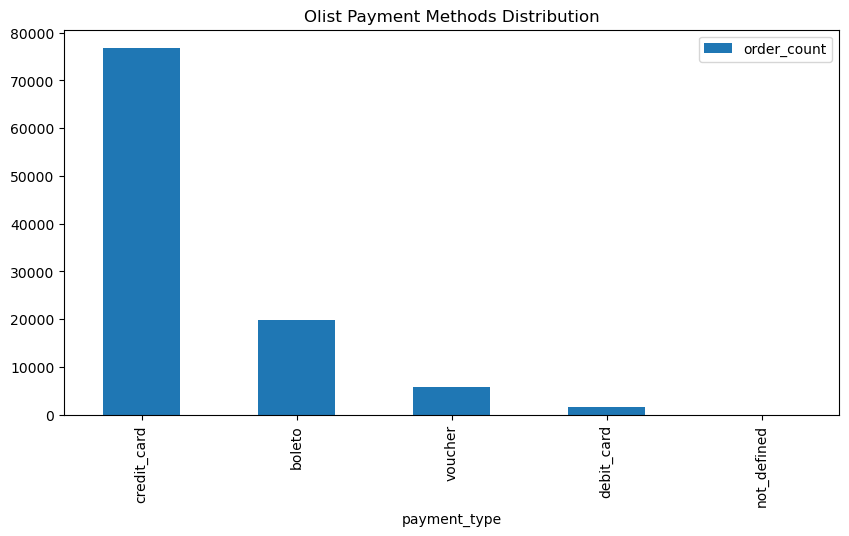

In [21]:
# 4. 画图
# 使用 matplotlib 绘制条形图
# 注意：y 必须对应你在 SQL 中起的别名 'order_count'
df.plot(kind='bar', x='payment_type', y='order_count', title='Olist Payment Methods Distribution', figsize=(10, 5))